# Machine Learning (Scikit-learn): Regressor

In this document, the performance of 5 different Machine Learning (ML) algorithms are
compared to solve the regression problem, this is, to predict the value of a continuous variable, in this case, it is the fuel consumption of a car. The following algorithms are implemented:

Algorithm 1: Lasso (Linear regressions with L1 regularization).

Algorithm 2: Ridge (Linear regressions with L2 regularization).

Algorithm 3: DecisionTreeRegressor.

Algorithm 4: RandomForestRegressor.

Algorithm 5: GradientBoostingRegressor.

## Exploratory data analysis (EDA)

In [17]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
# Read DataFrame
df = pd.read_csv('./auto_cons_us.csv', sep=',', header=0)

# Show DataFrame
df.head(3)

,Fuel consumption,# of cylinders,Engine displacement,Engine power,Weight,Acceleration,Year,Origin
0,13,8,5,130.0,1589,12.0,2005,US
1,16,8,6,165.0,1675,11.5,2005,US
2,13,8,5,150.0,1559,11.0,2005,US


Column 'Fuel consumption' will be renamed.

In [19]:
# Rename column
df = df.rename(columns={'Fuel consumption': 'output'})

In [20]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   output               398 non-null    int64  
 1   # of cylinders       398 non-null    int64  
 2   Engine displacement  398 non-null    int64  
 3   Engine power         392 non-null    float64
 4   Weight               398 non-null    int64  
 5   Acceleration         398 non-null    float64
 6   Year                 398 non-null    int64  
 7   Origin               398 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 25.0+ KB


Format of all columns is correct.

## Data preprocessing
Data preprocessing consist of:
1. Filling null values and dropping duplicates.
2. Processing outliers and multicollinearity.
3. Converting categorical variables into binary ones.
4. Standardizing (scaling) the data.

### Fill null values and drop duplicates

In [21]:
# Verify the number of null values per column
df.isna().sum()

output                 0
# of cylinders         0
Engine displacement    0
Engine power           6
Weight                 0
Acceleration           0
Year                   0
Origin                 0
dtype: int64

There are a few null values, they can be deleted.

In [22]:
# Delete null values
df = df.dropna()

# Verify the number of null values per column
df.isna().sum()

output                 0
# of cylinders         0
Engine displacement    0
Engine power           0
Weight                 0
Acceleration           0
Year                   0
Origin                 0
dtype: int64

In [23]:
# Delete duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

# Show duplicate rows
print(df.duplicated().sum())

0


### Process outliers and multicollinearity
A box plot is shown to verify if there exist outliers (no considerable outliers).

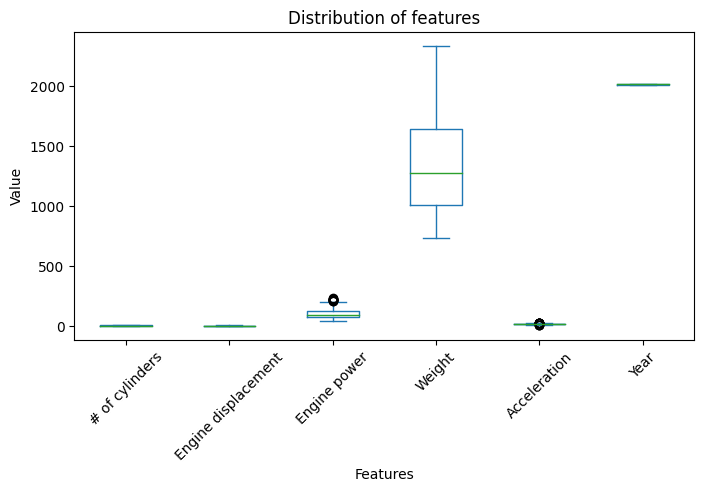

In [24]:
# Box plot
df.drop('output',axis=1).plot(kind='box', figsize=[8,4],
title='Distribution of features', xlabel='Features', ylabel='Value')
plt.xticks(rotation=45)
plt.show()

In order to see multicollinearity, a heatmap is shown (excluding column 'Origin').

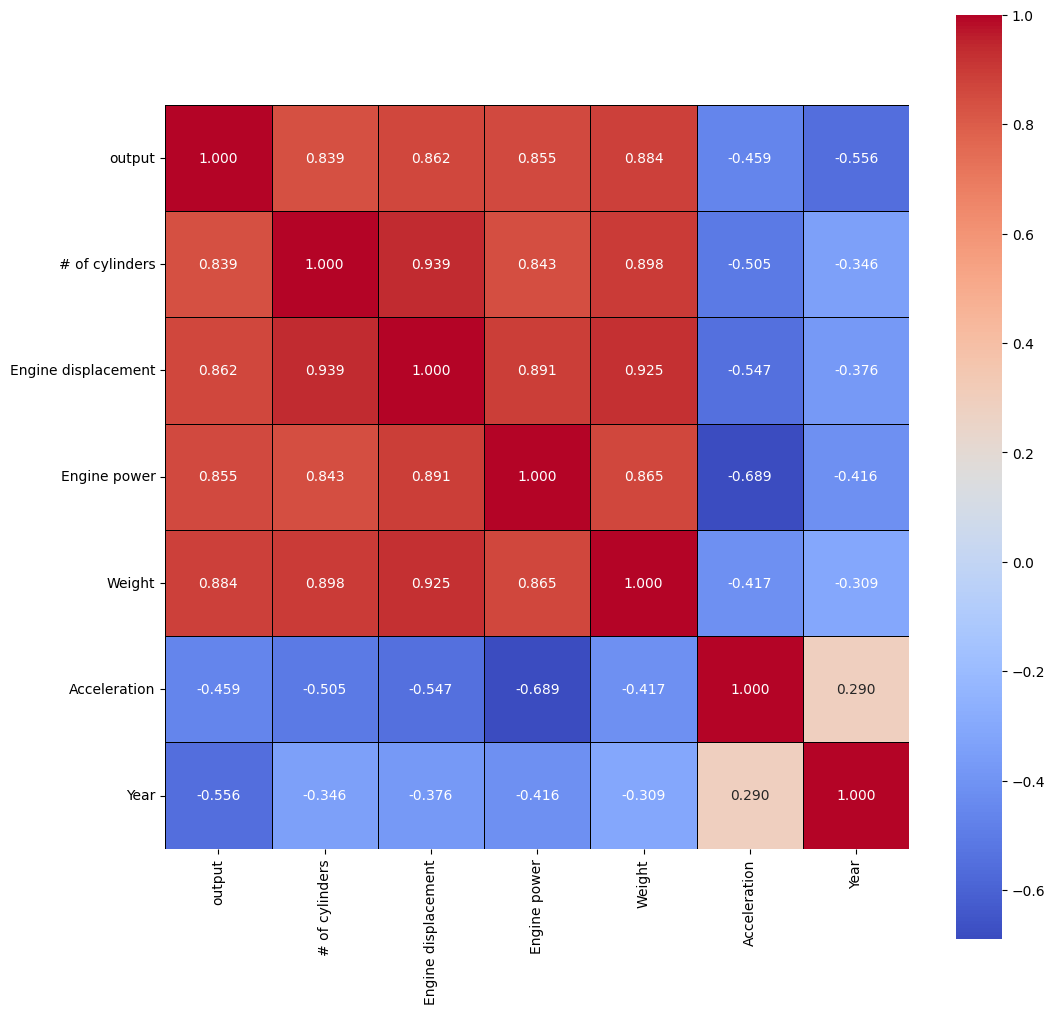

In [25]:
# Correlation matrix
cm = df.drop('Origin',axis=1).corr()

# Heatmap
plt.figure(figsize = (12,12))
sns.heatmap(cm, annot=True, square=True, cmap='coolwarm', fmt='.3f',
annot_kws={"size": 10}, linewidths=0.5, linecolor='black')
plt.show()

Column 'output' is correlated to all columns and '# of cylinders' is correlated to	'Engine displacement'.

### Convert categorical variables

In [26]:
# Show the columns of the DataFrame
print(df.columns)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df)
print(df.head(3))

Index(['output', '# of cylinders', 'Engine displacement', 'Engine power',
       'Weight', 'Acceleration', 'Year', 'Origin'],
      dtype='object')
   output  # of cylinders  Engine displacement  Engine power  Weight  \
0      13               8                    5         130.0    1589   
1      16               8                    6         165.0    1675   
2      13               8                    5         150.0    1559   

   Acceleration  Year  Origin_Asia  Origin_Europe  Origin_US  
0          12.0  2005        False          False       True  
1          11.5  2005        False          False       True  
2          11.0  2005        False          False       True  


Two columns were added.

### Data standarization

In [27]:
# Obtain characteristic matrix (x) and objective variable (y)
x = df.drop('output', axis=1)
y = df['output']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.2, random_state=0)

# Train the StandardScaler by using 'x_train', then transform 'x_train' and 'x_test'
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

## Models creation
Five different models will be created.

In [28]:
# Define the regression models
models = [Lasso(), Ridge(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor()]

def mape(y_true, y_pred):
    '''Function to calculate Mean Absolute Percentage Error (MAPE)'''
    y_error = y_true - y_pred
    y_error_abs = np.array([abs(x) for x in y_error])
    y_true_abs = np.array([abs(x) for x in y_true])
    perc_error_abs = y_error_abs / y_true_abs
    mape = perc_error_abs.sum() / len(y_true)
    return mape

def make_prediction(m, x_train, y_train, x_test, y_test):
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    print('MAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f} '.format(mean_absolute_error(y_test, y_pred),
                                                                mean_squared_error(
                                                                    y_test, y_pred),
                                                                mape(
                                                                    y_test, y_pred),
                                                                r2_score(y_test, y_pred)))

In [29]:
# Iterate through the models and make predictions
for i in models:
    print(i)
    make_prediction(i, x_train_st, y_train, x_test_st, y_test)

Lasso()
MAE:1.41 MSE:3.53 MAPE:0.14 R2:0.78 
Ridge()
MAE:1.05 MSE:1.93 MAPE:0.09 R2:0.88 
DecisionTreeRegressor()
MAE:1.29 MSE:4.10 MAPE:0.11 R2:0.75 
RandomForestRegressor()
MAE:0.92 MSE:1.60 MAPE:0.08 R2:0.90 
GradientBoostingRegressor()
MAE:0.95 MSE:1.63 MAPE:0.09 R2:0.90 


**Conclusion:** 'Random Forest Regressor' and 'Gradient Boosting Regressor' obtained better results.

**Remark:** The column names and feature importances coefficients (for Random Forest Regressor)
are displayed to show which features most impact the algorithm's verdict.

In [30]:
# Show features
print(x.columns)

# Feature weights
print(models[3].feature_importances_)

Index(['# of cylinders', 'Engine displacement', 'Engine power', 'Weight',
       'Acceleration', 'Year', 'Origin_Asia', 'Origin_Europe', 'Origin_US'],
      dtype='object')
[0.04785126 0.1775742  0.22817266 0.44194058 0.02998811 0.07111567
 0.00089265 0.00090935 0.00155552]


Definitively, 'Weight' (feature importances coefficient = 0.5) is the most important factor that impacts the fuel consumption.